In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
cc = pd.read_csv("CC.csv", engine = "python")

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   object 
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
cc.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
min_value_payments = '0.019163'
cc['MINIMUM_PAYMENTS'].fillna(float(min_value_payments), inplace=True)

min_value_credit = '50.00000'
cc['CREDIT_LIMIT'].fillna(float(min_value_credit), inplace=True)


In [25]:
cc_var = cc.drop(['CUST_ID','ONEOFF_PURCHASES_FREQUENCY'], axis = 1)


In [20]:
cc_var.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.364437,0.135144,3.248827,14.709832,4493.952864,1733.143852,833.984123,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.397448,0.200121,6.824647,24.857649,3638.915681,2895.063757,2335.989679,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [26]:
cc_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8950 non-null   float64
 12  PAYMEN

In [27]:
cc_var.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Normalización


In [64]:

cc_norm = (cc_var - cc_var.min())/(cc_var.max() - cc_var.min())
cc_norm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans_Cluster
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.000000,0.000000,1.0,0.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,0.5
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.000000,0.000000,0.0,0.5
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,0.5
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,0.0


### Busqueda de la cantidad optima de clusters
###### Calcular que tan similares son los individuos dentro de los clusters

In [80]:
wscc = [] #Within cluster sum of squares 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(cc_norm) #Aplicamos KMeans a los datos
    wscc.append(kmeans.inertia_)

In [81]:
wscc

[6488.350382845851,
 3794.11609993794,
 2482.199330381337,
 2117.4100855761853,
 1842.4059465430544,
 1668.8917497650637,
 1563.853863996901,
 1412.039658959346,
 1409.6087850348783,
 1258.7644287945154]

Text(0, 0.5, 'WSCC')

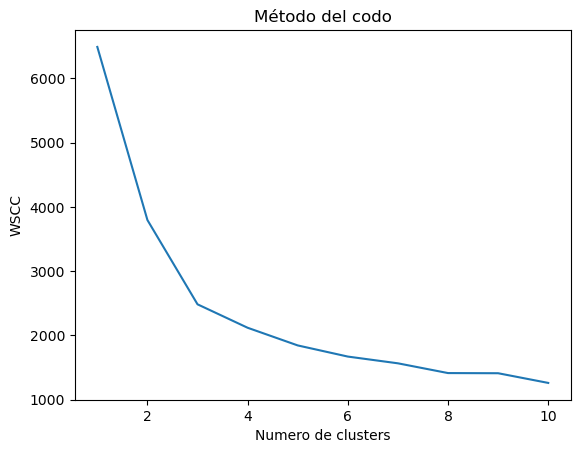

In [82]:
plt.plot(range(1,11), wscc)
plt.title("Método del codo")
plt.xlabel("Numero de clusters")
plt.ylabel("WSCC") #WSCC es un indicador de que tan similares son los individuos

### Aplicando K-Means

In [83]:
clustering = KMeans(n_clusters = 3, max_iter = 300) #Creamos el modelo
clustering.fit(cc_norm) #Aplica el modelo a los datos

KMeans(n_clusters=3)

### Agregando la clasificación al archivo original

In [101]:
cc_var['KMeans_Cluster'] = clustering.labels_ 
#Los resultados del clustering se guardan en labels_ dentro del modelo

cc_var.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans_Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.019163,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### Visualizando los clusters que se forman
###### Aplicaremos el analisis de componentes para darnos una idea de como fueron formados los Clusters

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #Grafico de dos dimensiones
pca_cc = pca.fit_transform(cc_norm) #Obtenemos los componentes principales
pca_cc_df = pd.DataFrame(data = pca_cc, columns = ["Componente_1", "Componente_2"])
pca_nombres_cc = pd.concat([pca_cc_df, cc_var[['KMeans_Cluster']]], axis = 1)
#Asignamos colores a los puntos en base al cluster al que pertenecen

pca_nombres_cc


,Componente_1,Componente_2,KMeans_Cluster
0,-0.573869,-0.133898,1
1,-0.702305,-0.109143,1
2,0.320556,0.349316,0
3,-0.683518,-0.022916,1
4,-0.676121,-0.177862,1
...,...,...,...
8945,0.698215,-0.119167,2
8946,0.591015,-0.224547,2
8947,0.434233,-0.000531,2
8948,-0.715283,0.026614,1


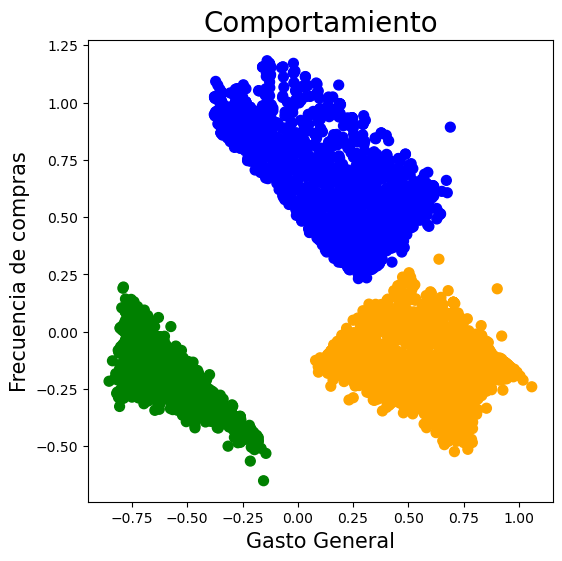

In [105]:
fig = plt.figure(figsize = (6,6)) #Creamos figura de tamaño 6x6

ax = fig.add_subplot(1,1,1) #Le indico que solo creare un grafico en la figura
ax.set_xlabel("Gasto General", fontsize = 15)
ax.set_ylabel("Frecuencia de compras", fontsize = 15)
ax.set_title("Comportamiento", fontsize = 20)

color_theme = np.array(['blue', 'green', 'orange'])

ax.scatter(x = pca_nombres_cc.Componente_1, y = pca_nombres_cc.Componente_2,
          c = color_theme[pca_nombres_cc.KMeans_Cluster], s=50)


In [ ]:
cc_var.to_csv("payments_cluster.csv")